# Diseño  de Experimentos

El objetivo del diseño de experimentos es rechazar o aceptar una hipótesis. En análisis de algoritmos, podríamos formular una hipótesis respecto al desempeño de un algoritmo relacionado al tamaño del problema o bien a la capacidad de explotar mejores casos. 

El proceso de análisis comienza con la formulación de una hipótesis (por ejemplo, algoritmo A es mejor que el algoritmo B). Por lo tanto, el diseño experimental debe ser creado con el fin de probar esa hipótesis. Luego se recolectan y analizan datos. Finalmente se establecen conclusiones con respecto a la hipótesis. De manera de establecer conclusiones respecto al experimento, se debe utilizar inferencia estadística ya que necesitamos generalizar nuestros resultados a una población mayor que los datos observados. 


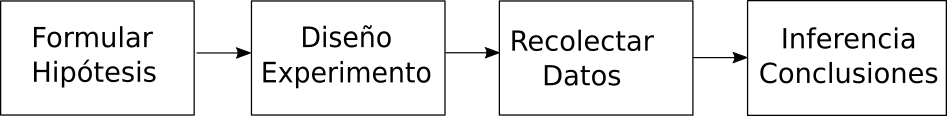

In [1]:
from IPython.display import Image
Image(filename='images/experimentos.png')

# Pruebas de Hipótesis

Las pruebas de hipotesis sirven para comprobar la veracidad de una hipotesis nula (las medias de los dos grupos de estudio son iguales) versus una hipotesis alternativa. El valor-p es la probabilidad de rechazar una hipotesis nula. Si el valor-p es mayor o igual que un nivel de significancia (generalmente 5%), entonces la hipotesis nula puede ser rechazada. 

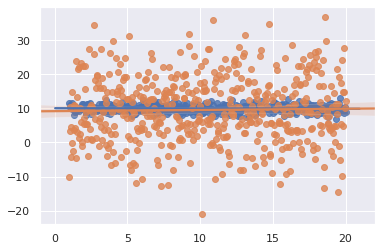

Ttest_indResult(statistic=0.09576247052812979, pvalue=0.923747662089629)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="darkgrid")

samples=500

x=np.linspace(1,20,samples)

# medias iguales
y_1=np.random.normal(10,1,samples)
y_2=np.random.normal(10,10,samples)

sns.regplot(x=x, y=y_1, fit_reg=True)
sns.regplot(x=x, y=y_2, fit_reg=True)
plt.show()

print(stats.ttest_ind_from_stats(np.mean(y_1),np.var(y_1),len(y_1),
                                 np.mean(y_2),np.var(y_2),len(y_2),equal_var=False))

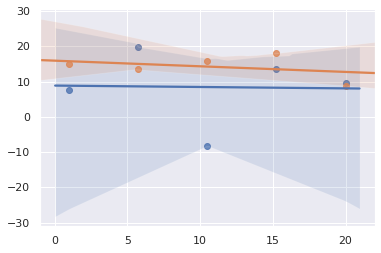

Ttest_indResult(statistic=-0.14991610287101567, pvalue=0.8845415197381696)


In [20]:
# medias distintas
samples=5

x=np.linspace(1,20,samples)

y_3=np.random.normal(0,10,samples)
y_4=np.random.normal(10,10,samples)

sns.regplot(x=x, y=y_3, fit_reg=True)
sns.regplot(x=x, y=y_4, fit_reg=True)
plt.show()

print(stats.ttest_ind_from_stats(np.mean(y_3),np.var(y_3),len(y_3),
                                 np.mean(y_4),np.var(y_4),len(y_4),equal_var=True)) 

# Correlación

En estadistica se usa la correlación para definir la similtud entre dos variables aleatorias $X$ e $Y$. El criterio más comunmente usado es el coeficiente de Pearson, definido por:

$\rho_{X,Y}=\frac{\operatorname{COV}(X,Y)}{\sigma_x \sigma_y}$

Donde $\operatorname{COV}(X,Y)= \frac{\sum_i (x_i - \bar x)(y_i - \bar y)}{\sqrt{\sum_i (x_i - \bar x)^2} \sqrt{\sum_i (y_i - \bar y)^2}}$ es la covarianza entre $X$ e $Y$,  $\sigma_x$ la desviación estándar y $\bar x$ la media.

El coeficiente de correlación de Pearson mide la relación lineal entre dos variables Gaussianas. Sin embargo, las medias no necesariamente son iguales. La interpretación es que un valor $\rho_{X,Y}\approx 1$ significa una alta correlacion lineal. El valor $\rho_{X,Y}\approx 0$ implica que no hay correlacion y $\rho_{X,Y}\approx -1$ implica una correlación negativa (a medida que $x$ aumenta, el valor de $y$ disminuye).


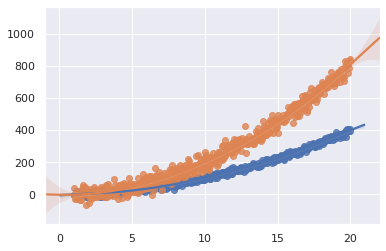

(0.9713354445737017, 6.9185590069e-313)
(0.9666742200139904, 7.576009628047495e-297)


In [32]:
samples=500

x=np.linspace(1,20,samples)

y_5=x**2+np.random.normal(0,10,samples)
y_6=2*x**2+np.random.normal(0,30,samples)

sns.regplot(x=x, y=y_5, fit_reg=True,order=6)
sns.regplot(x=x, y=y_6, fit_reg=True,order=6)
plt.show()

print(stats.pearsonr(y_5, x))
print(stats.pearsonr(y_6, x))

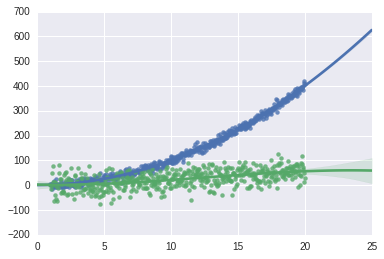

(0.50661943888494509, 5.9041841218629359e-34)


In [4]:
import math

samples=500

x=np.linspace(1,20,samples)

y_7=x**2+np.random.normal(0,10,samples)
y_8=x*np.log(x)+np.random.normal(0,30,samples)

sns.regplot(x=x, y=y_7, fit_reg=True,order=2)
sns.regplot(x=x, y=y_8, fit_reg=True,order=3)
plt.show()

print stats.pearsonr(y_7, y_8)

# Regresión

La regresión lineal simple cuantifica el cambio de una variable dependiente $y$ cuando otra variable independiente varía $x$. Es decir, que tratamos de escribir la variable $y$ usando una relación lineal del tipo:

$y= w_o + w_1 x$

donde $w_o$ y $w_1$ son coeficientes que se estiman a partir de los datos. El intercepto $w_0$ cuantifica la variable $y$ para el valor $x=0$ y el coeficiente $w_1$ se interpreta como la pendiente de la recta (para cada incremento unitario de la variable $x$, la variable $y$ aumenta $w_1$ veces). 

En la practica, los coeficientes se estiman a través del método de mínimos cuadrados (OLS). Los parámetros estimados $\hat w_o$ y $\hat w_1$ pueden ser usados para predecir la variable dependiente $\hat y$ y de esa forma estimar el error residual:

$RSS= \sum_i (y_i-\hat y_i)^2$

Ahora es posible cuantificar la relación lineal entre las variables dependientes e independientes. La estadística $R^2$ es un valor entre $0$ y $1$ que a medida que aumenta, indica un mejor ajuste. 

$R^2= \frac{TSS-RSS}{TSS}$

donde $TSS=\sum_i (y_i-\bar y)^2$

[ 0.85381993  2.51649766]


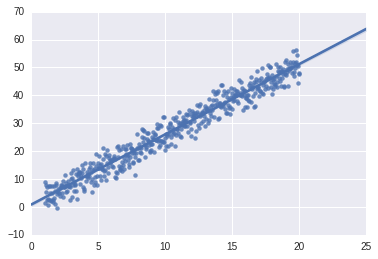

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 1.083e+04
Date:                Thu, 16 Aug 2018   Prob (F-statistic):               0.00
Time:                        10:40:05   Log-Likelihood:                -1253.0
No. Observations:                 500   AIC:                             2510.
Df Residuals:                     498   BIC:                             2518.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8538      0.287      2.980      0.003       0.291       1.417
x1             2.5165      0.024    104.076      0.000       2.469       2.564
==============================================================================
Omnibus:                        4.260   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.364
Skew:                          -0.084   Prob(JB):                        0.186
Kurtosis:                       2.635   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
import statsmodels.api as sm

samples=500

x=np.linspace(1,20,samples)

y_9=1.0+2.5*x+np.random.normal(0,3,samples)

x_1 = sm.add_constant(x)

model = sm.OLS(y_9, x_1).fit()

print model.params

sns.regplot(x=x, y=y_9, fit_reg=True)
plt.show()

model.summary()